# Topic 3: Investment

This notebook uses data from <a href="http://www.econ.yale.edu/~shiller/data.htm">Robert Shiller's website</a> to plot the evolution of stock market valuation over time. In particular, Robert Shiller's dataset contains the reconstruction of the S&P 500 stock market index going back to 1871.

In [1]:
# load definitions
%matplotlib inline
from defs_intermediate_macro import *
%run defs_intermediate_macro

# Robert Shiller's stock market data

In [2]:
# load Robert Shiller's stock market data
data_Shiller = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls',sheet_name='Data')

In [3]:
# process the Shiller data - create column names from first rows of the spreadsheet
d = data_Shiller
d.iloc[0:7,:] = d.iloc[0:7,:].to_numpy().astype('str')
d[d=='nan'] = ''; d.iloc[0:2,0] = ''
d.columns = d.iloc[0,:]+ ' ' + d.iloc[1,:] + ' ' + d.iloc[2,:] + ' ' + d.iloc[3,:] + ' ' + d.iloc[4,:] + ' ' + d.iloc[5,:] + ' ' + d.iloc[6,:]
d.columns = d.columns.str.strip()       # strip spaces
d = d[7:]                               # drop rows from which column names were created
d = d.drop(d[d['Date'].isna()].index)   # drop rows with NaN Date values
d.set_index('Date   Fraction');

## S&P 500 reconstructed back to 1871

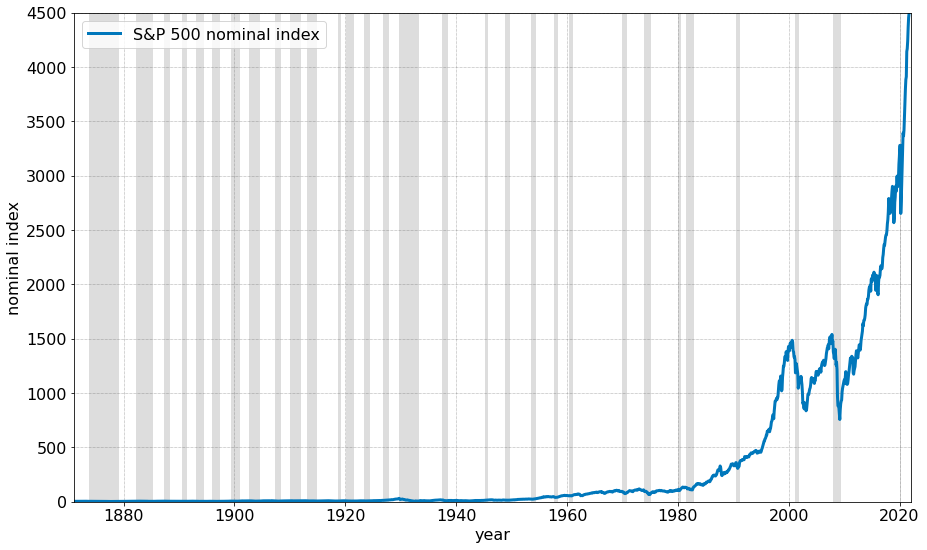

In [4]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1871,2022], 'ylim': [0,4500],
         'xlabel': 'year', 'ylabel': 'nominal index',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,4800]}

fig,ax = myGenerateTSPlot(param)

ax.plot(d['Date   Fraction'],d['S&P Comp. P'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='S&P 500 nominal index')
x = ax.legend(loc='upper left')

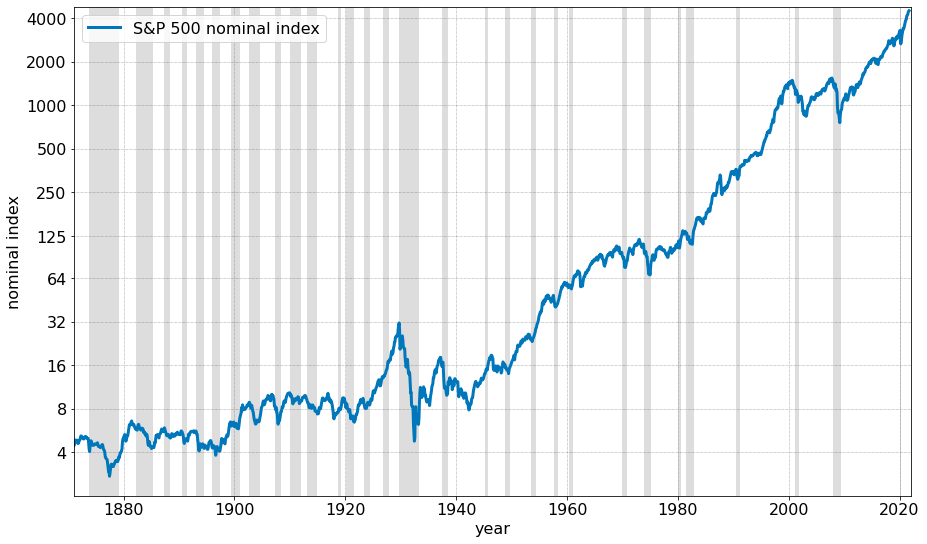

In [5]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1871,2022], 'ylim': [2,4800],
         'xlabel': 'year', 'ylabel': 'nominal index',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [2,4800]}

fig,ax = myGenerateTSPlot(param)

ax.plot(d['Date   Fraction'],d['S&P Comp. P'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='S&P 500 nominal index')
x = ax.legend(loc='upper left')
ax.minorticks_off()   
ax.set_yticks([4,8,16,32,64,125,250,500,1000,2000,4000]);

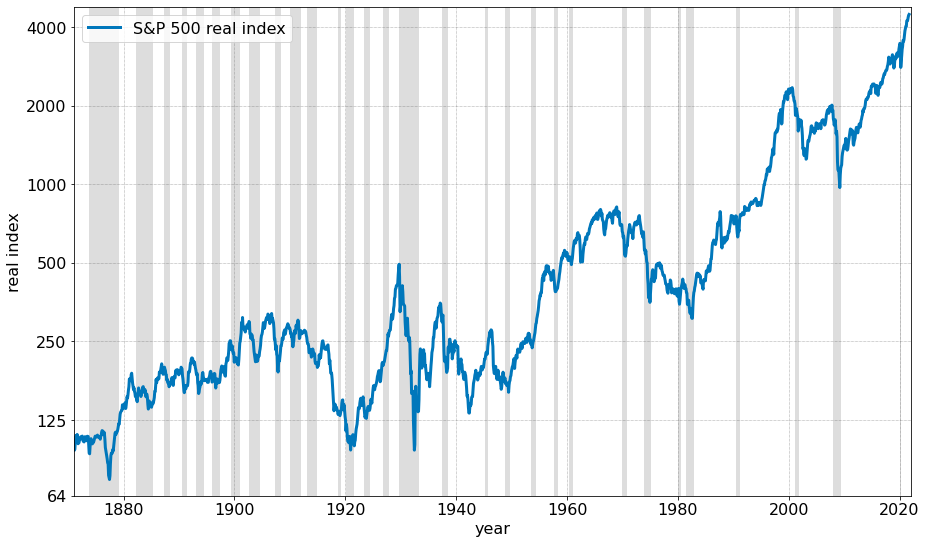

In [6]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1871,2022], 'ylim': [64,4800],
         'xlabel': 'year', 'ylabel': 'real index',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [64,4800]}

fig,ax = myGenerateTSPlot(param)

ax.plot(d['Date   Fraction'],d['Real Price'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='S&P 500 real index')
x = ax.legend(loc='upper left')
ax.minorticks_off()   
ax.set_yticks([64,125,250,500,1000,2000,4000]);

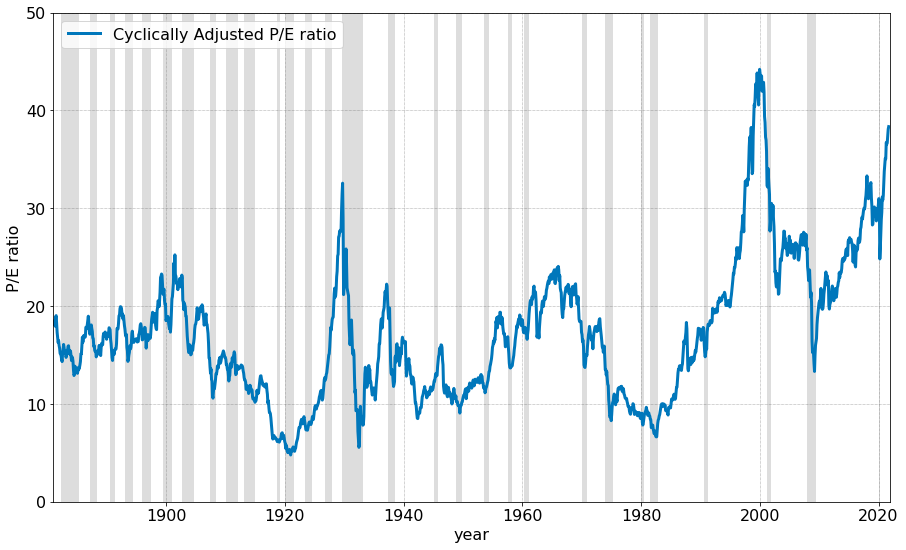

In [7]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1881,2022], 'ylim': [0,50],
         'xlabel': 'year', 'ylabel': 'P/E ratio',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,50]}

fig,ax = myGenerateTSPlot(param)

ax.plot(d['Date   Fraction'],d['Cyclically Adjusted Price Earnings Ratio P/E10 or CAPE'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Cyclically Adjusted P/E ratio')
x = ax.legend(loc='upper left')

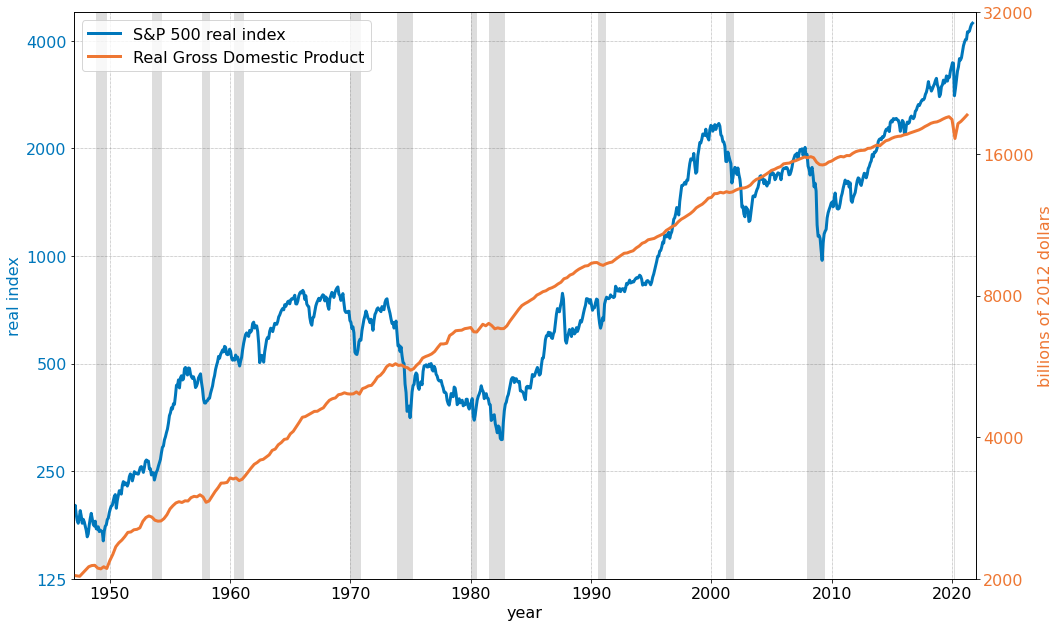

In [8]:
# load real GDP data from FRED
data_GDP = myLoadDataFRED(series=['GDPC1'],transform='none')

# plot graph
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1947,2022], 'ylim': [125,4800],
         'xlabel': 'year', 'ylabel': '',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [125,4800]}

fig,ax = myGenerateTSPlot(param)

# plot S&P 500 index
ln1 = ax.plot(d['Date   Fraction'],d['Real Price'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='S&P 500 real index')

ax.minorticks_off()   
ax.set_yticks([125,250,500,1000,2000,4000]);
ax.tick_params(axis='y', labelcolor=myColor['tolVibrantBlue'])
ax.set_ylabel('real index',color=myColor['tolVibrantBlue']);

# add right axis with GDP
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ln2 = ax2.plot(data_GDP['year'],data_GDP['GDPC1'],
                    linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='Real Gross Domestic Product')
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, 
    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax2.yaxis.set_minor_formatter(ticker.FuncFormatter(lambda y,
    pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

ax2.set_ylim([2000,32000])
ax2.minorticks_off()
ax2.tick_params(axis='y', labelcolor=myColor['tolVibrantOrange'])
ax2.set_yticks([2000,4000,8000,16000,32000]);
ax2.set_ylabel('billions of 2012 dollars',color=myColor['tolVibrantOrange']);

# add legend
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

## Average returns

Report average returns over the very long sample.

In [9]:
# Calculate average returns

# stock market
Pe = d['Real Total Return Price'].to_numpy()
t = d['Date   Fraction'].to_numpy()
ERe = ((Pe[-1]/Pe[0])**(1/(t[-1]-t[0]))-1)*100
print(f"Average real annual return on the stock market: {ERe}.")
print(f"Average from the 10-year annualized real stock market returns: {d['10 Year Annualized Stock Real Return'].mean()*100}.")

# 10-year government bonds
Pb = d['Real Total Bond Returns'].to_numpy()
ERb = ((Pb[-1]/Pb[0])**(1/(t[-1]-t[0]))-1)*100
print(f"Average real annual return on the 10-year bond: {ERb}.")
print(f"Average from the 10-year annualized real returns on 10-year government bond: {d['10 Year Annualized Bonds  Real Return'].mean()*100}.")

Average real annual return on the stock market: 7.064518250118557.
Average from the 10-year annualized real stock market returns: 6.871257399473858.
Average real annual return on the 10-year bond: 2.672438859440973.
Average from the 10-year annualized real returns on 10-year government bond: 2.5675698762064307.


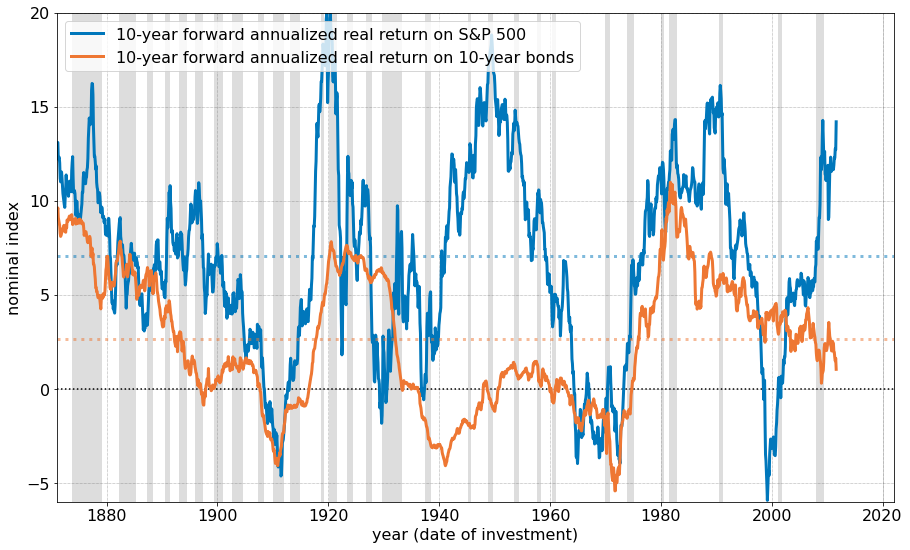

In [15]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1871,2022], 'ylim': [-6,20],
         'xlabel': 'year (date of investment)', 'ylabel': 'nominal index',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-6,20]}

fig,ax = myGenerateTSPlot(param)

ax.plot(d['Date   Fraction'],d['10 Year Annualized Stock Real Return']*100,
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='10-year forward annualized real return on S&P 500')
ax.plot(param['xlim'],[ERe,ERe],
                    linewidth=3,alpha=0.5,linestyle='dotted',marker='',color=myColor['tolVibrantBlue'])

ax.plot(d['Date   Fraction'],d['10 Year Annualized Bonds  Real Return']*100,
                    linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='10-year forward annualized real return on 10-year bonds')
ax.plot(param['xlim'],[ERb,ERb],
                    linewidth=3,alpha=0.5,linestyle='dotted',marker='',color=myColor['tolVibrantOrange'])

x = ax.legend(loc='upper left')

# Example 1: post-2006 period

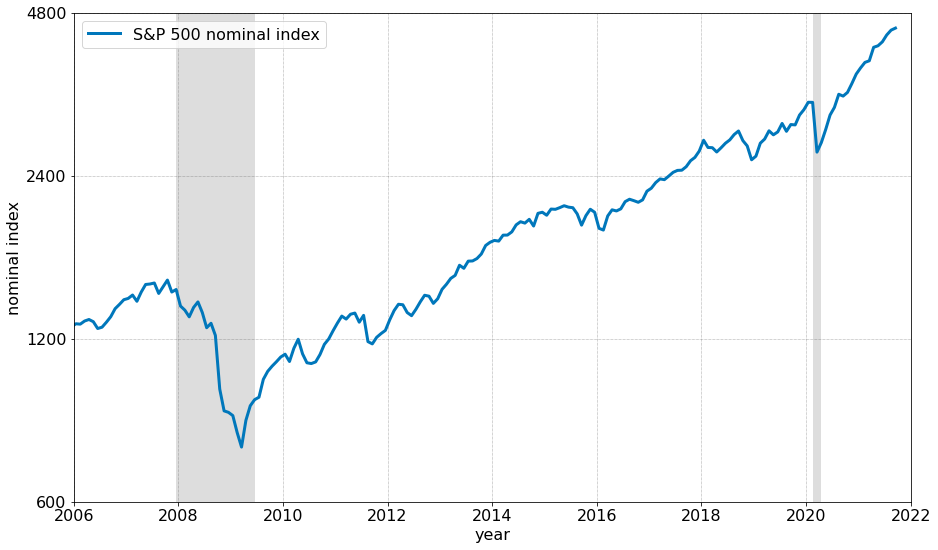

In [17]:
# load real GDP data from FRED
data_SP500_FRED = myLoadDataFRED(series=['SP500'],transform='none')

# plot graph
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [2006,2022], 'ylim': [600,4800],
         'xlabel': 'year', 'ylabel': 'nominal index',
         'ylogscale': True,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [600,4800]}

fig,ax = myGenerateTSPlot(param)

ln1 = ax.plot(d['Date   Fraction'],d['S&P Comp. P'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='S&P 500 nominal index')

ax.minorticks_off()   
ax.set_yticks([600,1200,2400,4800]);
ax.legend(loc='upper left')

# Example 2: The COVID-19 epidemic

This example uses a processed spreadsheet that includes Robert Shiller's data as well as epidemiological data on reported covid-19 cases from Johns Hopkins University database.

In [13]:
# load a local dataset containing the stock market and epidemic data
data_covid_FRED = pd.read_excel('data/data - covid-19 epidemic.xlsx',sheet_name='FRED daily data')
data_covid_epi = pd.read_excel('data/data - covid-19 epidemic.xlsx',sheet_name='epidemic data')
data_covid_events = pd.read_excel('data/data - covid-19 epidemic.xlsx',sheet_name='events')

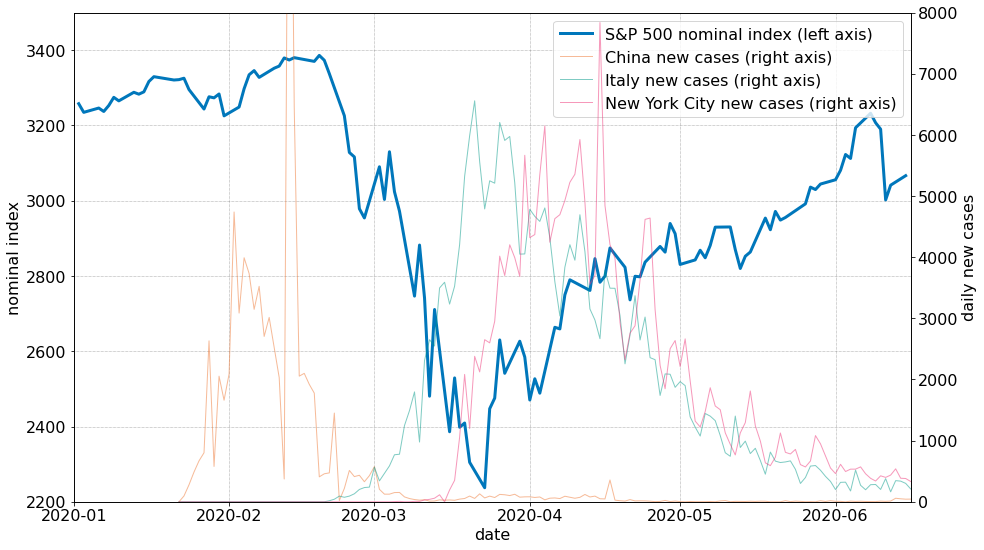

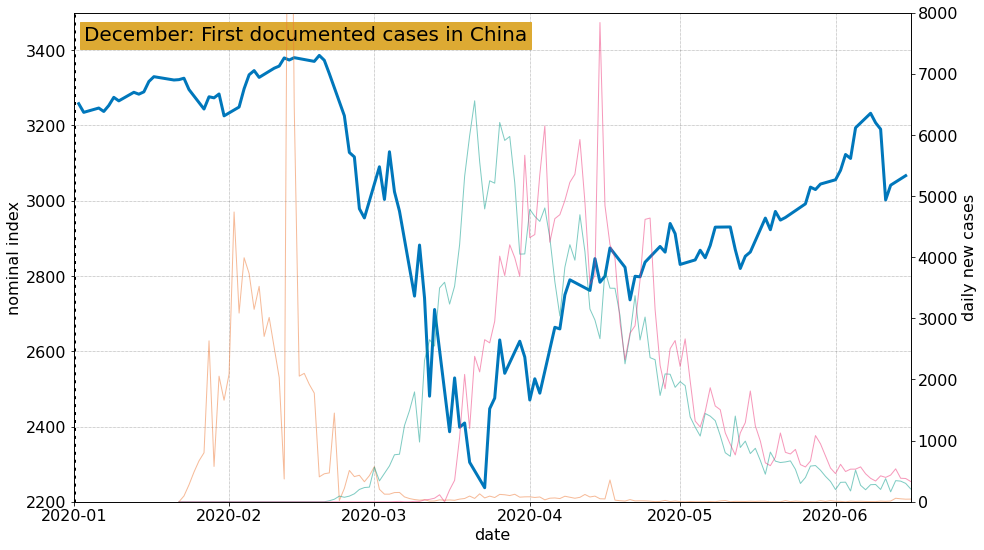

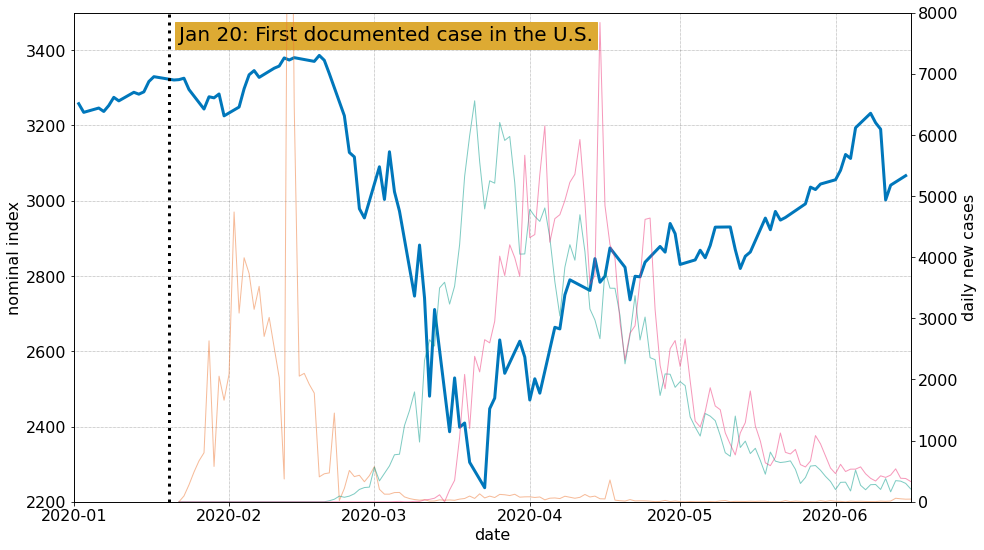

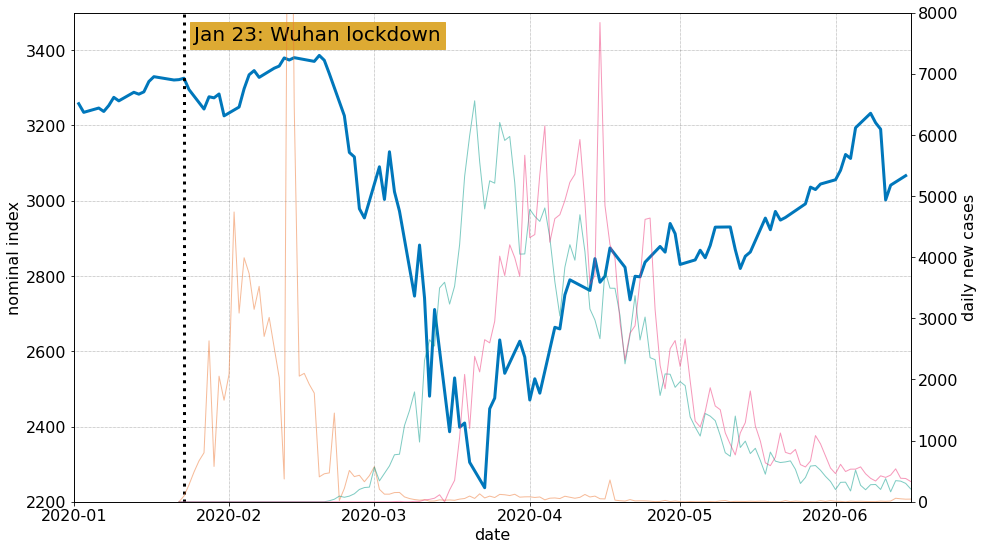

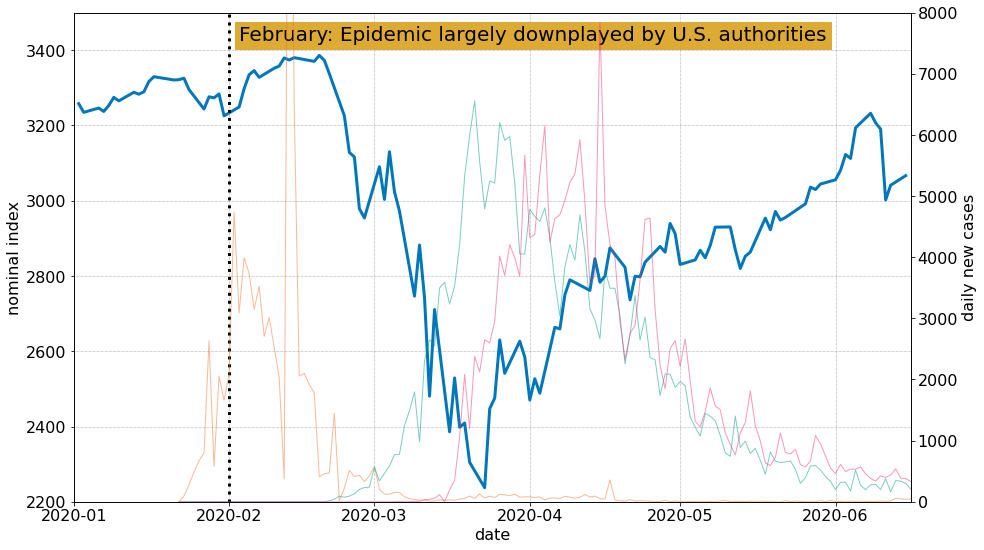

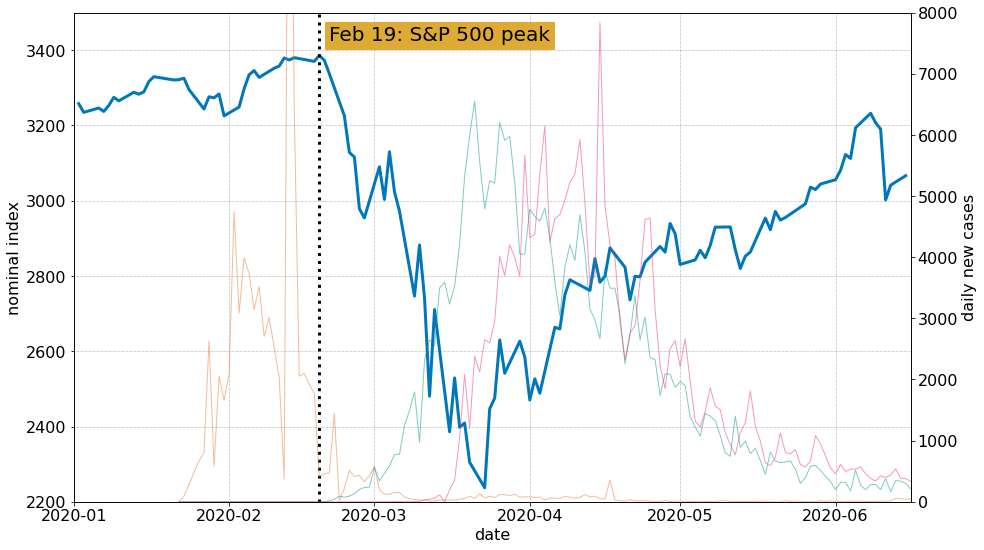

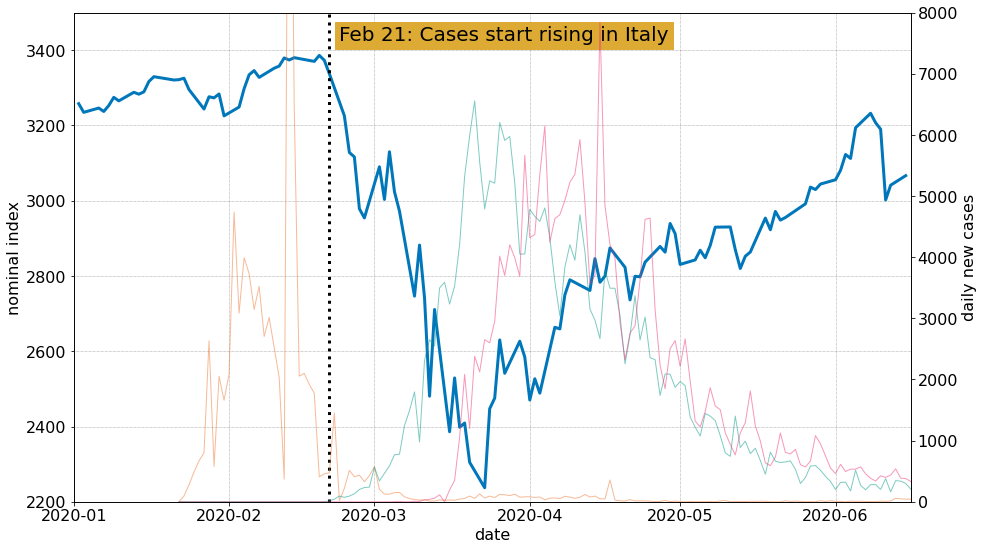

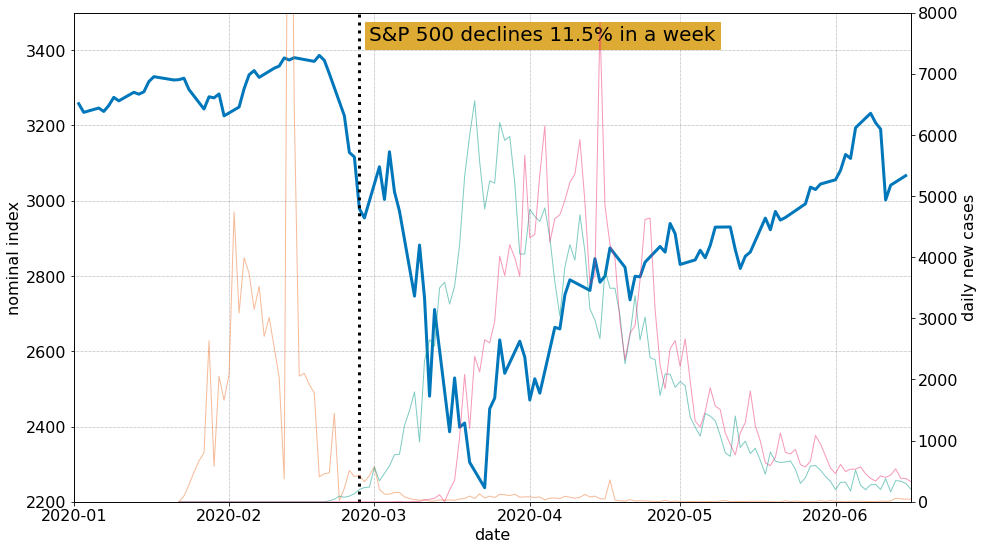

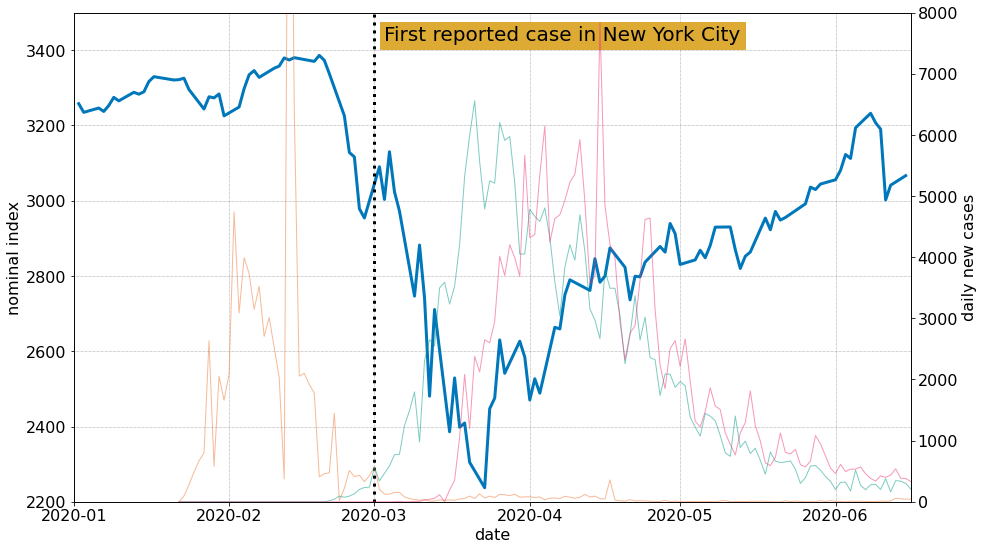

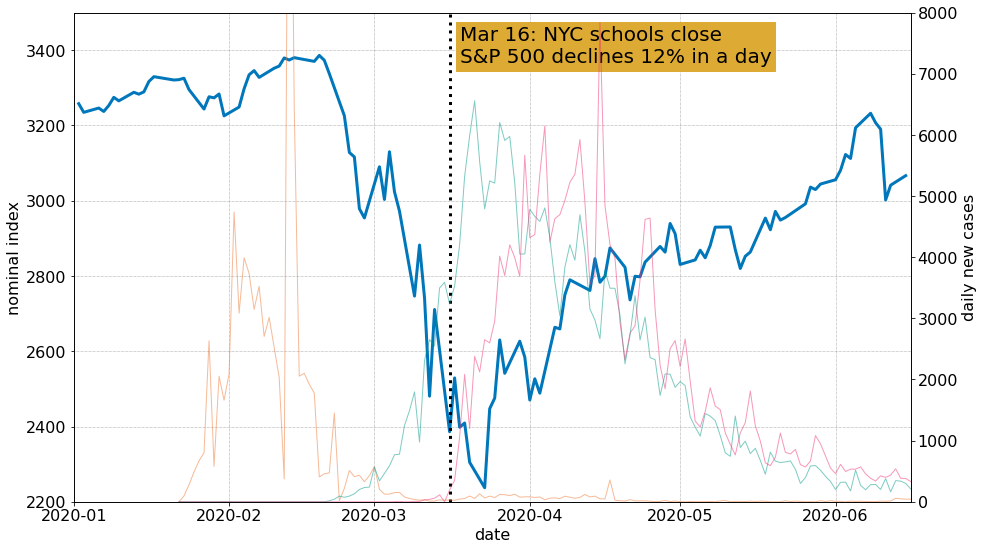

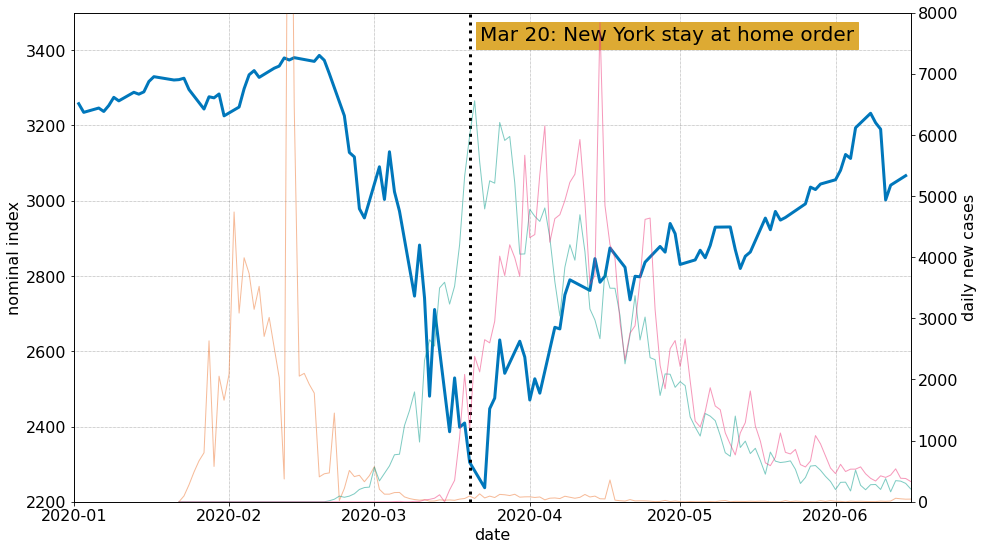

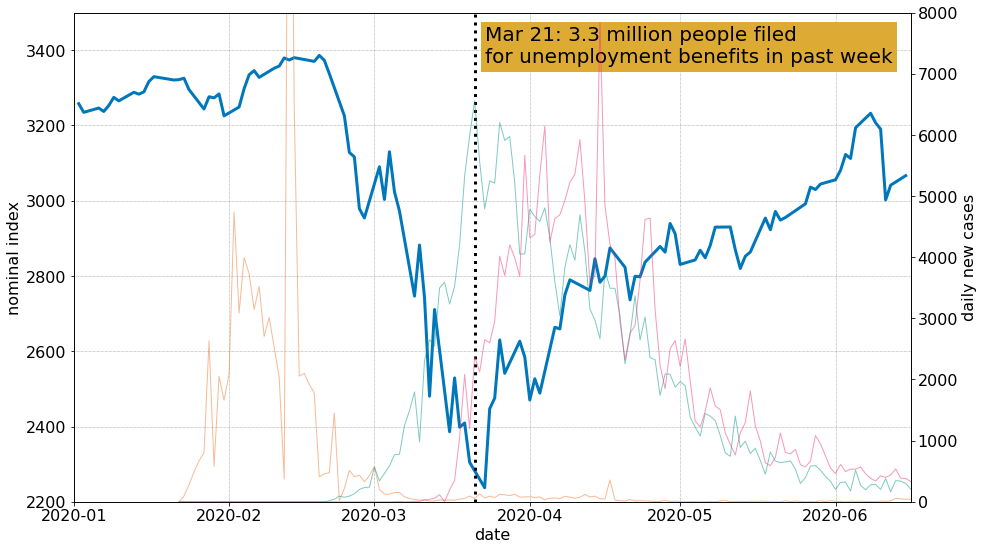

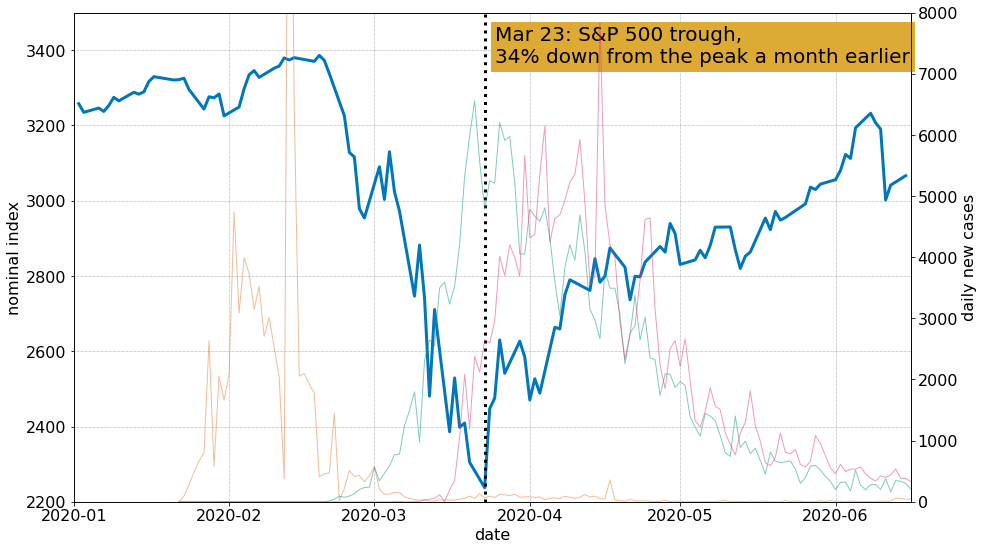

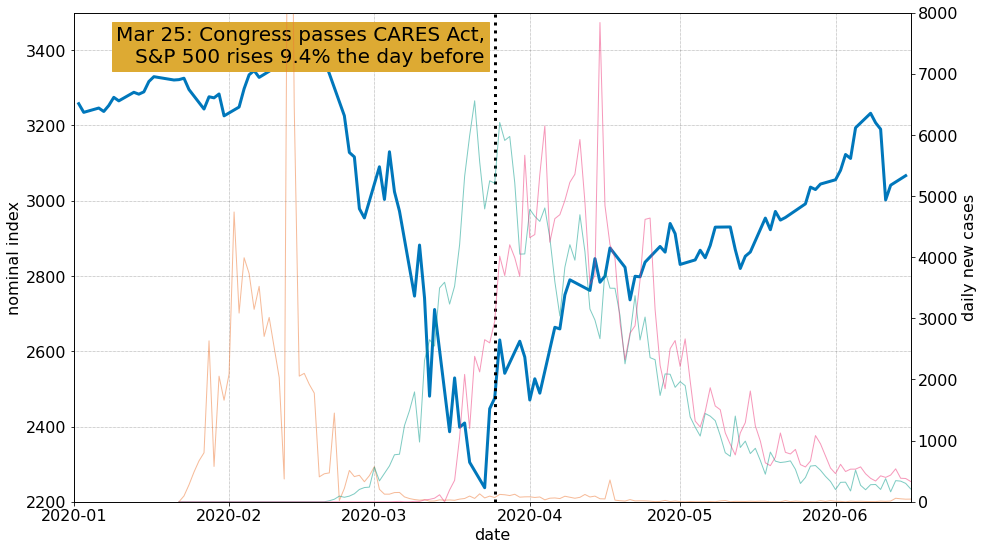

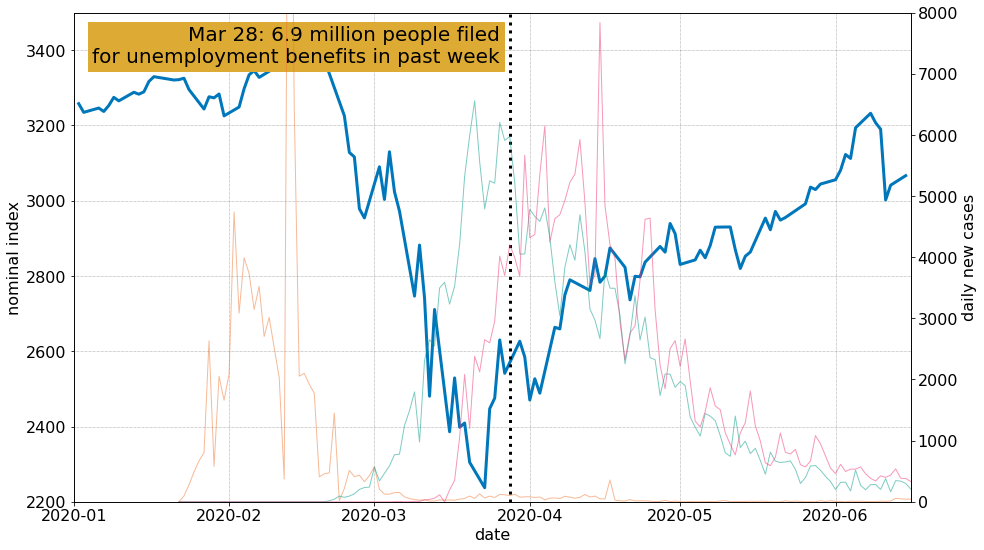

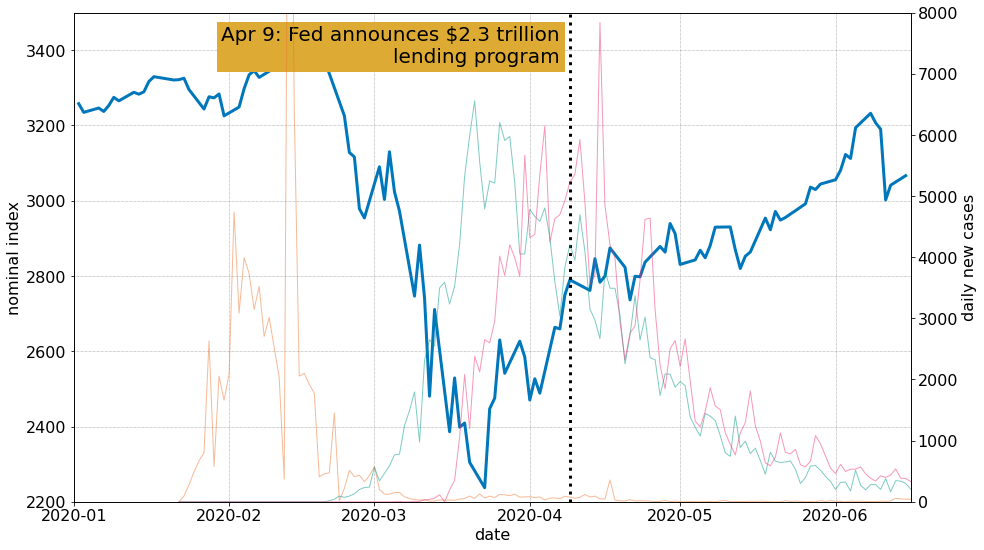

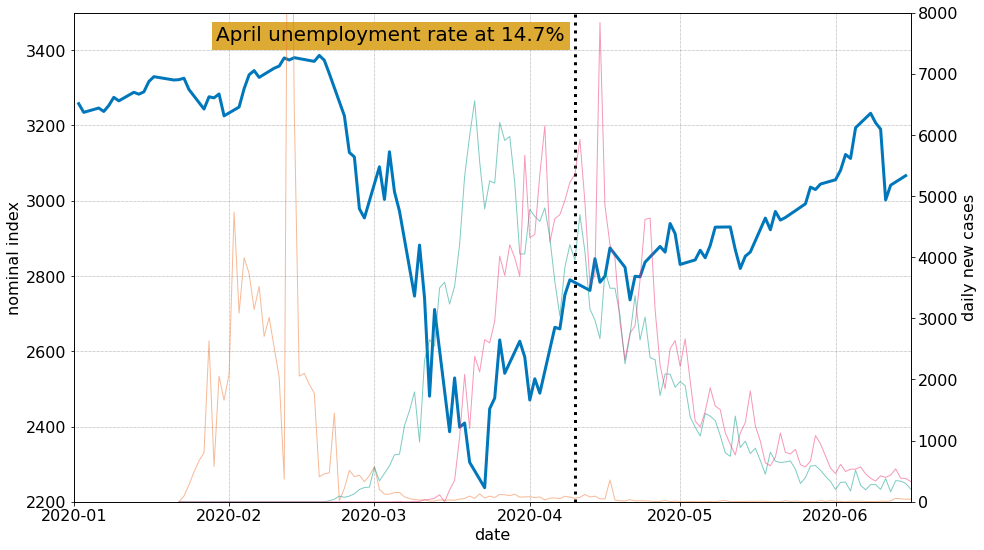

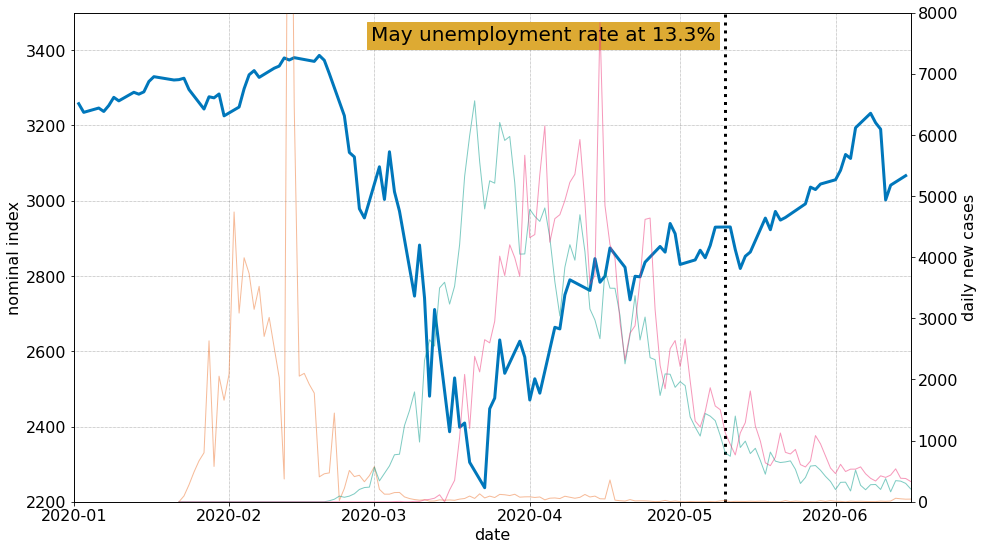

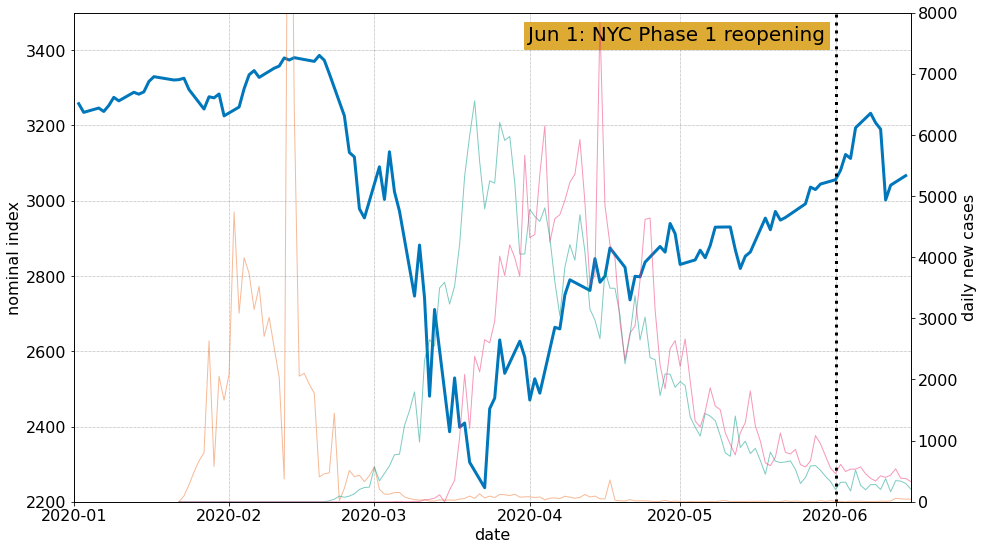

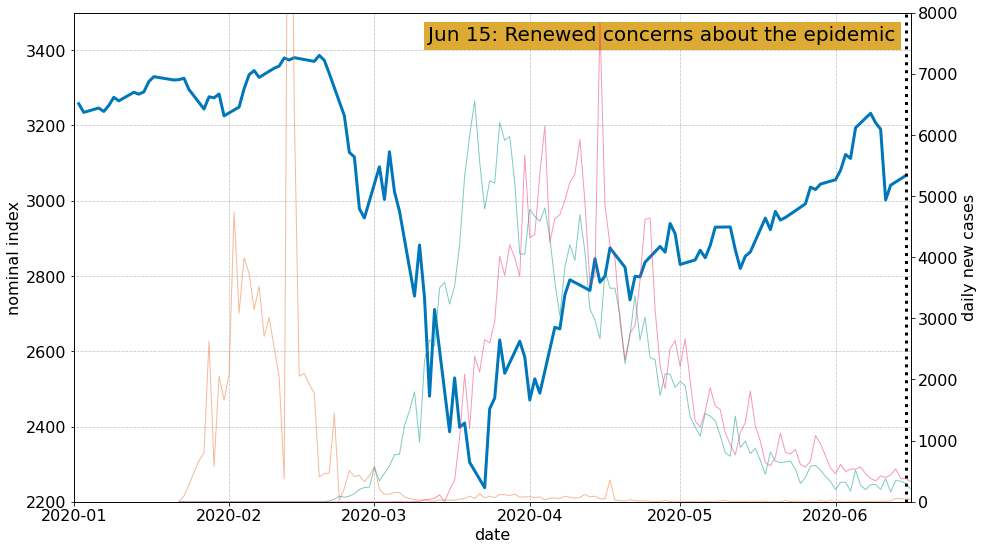

In [19]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [datetime.datetime(2020,1,1),datetime.datetime(2020,6,16)], 'ylim': [2200,3500],
         'xlabel': 'date', 'ylabel': 'nominal index',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [600,4800]}

dx = data_covid_FRED['day'].to_numpy()
dy = data_covid_FRED['S&P 500 close'].to_numpy()

fig,ax1 = myGenerateTSPlot(param)

ln1 = ax1.plot(data_covid_FRED['day'][np.isnan(dy)==False],dy[np.isnan(dy)==False],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='S&P 500 nominal index (left axis)')
#ax1.set_xlim([datetime.datetime(2020,1,1),datetime.datetime(2020,6,16)])

# add right axis with epidemic data
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ln2 = ax2.plot(data_covid_epi['day'],data_covid_epi['China new cases'],
                    linewidth=1,marker='',color=myColor['tolVibrantOrange'],label='China new cases (right axis)',alpha=0.5)
ln3 = ax2.plot(data_covid_epi['day'],data_covid_epi['Italy new cases'],
                    linewidth=1,marker='',color=myColor['tolVibrantTeal'],label='Italy new cases (right axis)',alpha=0.5)
ln4 = ax2.plot(data_covid_epi['day'],data_covid_epi['New York City new cases'],
                    linewidth=1,marker='',color=myColor['tolVibrantMagenta'],label='New York City new cases (right axis)',alpha=0.5)
ax2.set_ylim([0,8000])
ax2.set_ylabel('daily new cases')

# add legend
lns = ln1 + ln2 + ln3 + ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right')

# roll through all events
for index,row in data_covid_events.iterrows():
    
    fig,ax1 = myGenerateTSPlot(param)

    ln1 = ax1.plot(data_covid_FRED['day'][np.isnan(dy)==False],dy[np.isnan(dy)==False],
                        linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='S&P 500 nominal index (left axis)')
    ax1.set_xlim([datetime.datetime(2020,1,1),datetime.datetime(2020,6,16)])

    # add right axis with epidemic data
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ln2 = ax2.plot(data_covid_epi['day'],data_covid_epi['China new cases'],
                        linewidth=1,marker='',color=myColor['tolVibrantOrange'],label='China new cases (right axis)',alpha=0.5)
    ln3 = ax2.plot(data_covid_epi['day'],data_covid_epi['Italy new cases'],
                        linewidth=1,marker='',color=myColor['tolVibrantTeal'],label='Italy new cases (right axis)',alpha=0.5)
    ln4 = ax2.plot(data_covid_epi['day'],data_covid_epi['New York City new cases'],
                        linewidth=1,marker='',color=myColor['tolVibrantMagenta'],label='New York City new cases (right axis)',alpha=0.5)
    ax2.set_ylim([0,8000])
    ax2.set_ylabel('daily new cases')

    ax1.plot([row['day'],row['day']],param['ylim'],linewidth=3,linestyle='dotted',color=myColor['tolHighContrastBlack'])
    event_text = row['event'].replace('|','\n')
    if ((row['day']-param['xlim'][0])/(param['xlim'][1]-param['xlim'][0]))<0.5:        
        t = ax1.text(row['day']+datetime.timedelta(days=2),param['ylim'][1]*0.99,event_text,
                 fontsize=20,va='top')
    else:
        t = ax1.text(row['day']-datetime.timedelta(days=2),param['ylim'][1]*0.99,event_text,
                 fontsize=20,va='top',ha='right')
    tbox = t.get_bbox_patch()
    t.set_bbox(dict(facecolor=myColor['tolHighContrastYellow'], alpha=1, edgecolor=myColor['tolHighContrastYellow']))